# Handling Missing Data

In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving WSNBFSFdataset_DSprog.csv to WSNBFSFdataset_DSprog.csv


In [2]:
df = pd.read_csv('WSNBFSFdataset_DSprog.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Event           50000 non-null  int64  
 1   Time            48302 non-null  float64
 2   S_Node          50000 non-null  int64  
 3   Node_id         50000 non-null  int64  
 4   Rest_Energy     48290 non-null  float64
 5   Trace_Level     46102 non-null  float64
 6   Mac_Type_Pckt   48222 non-null  float64
 7   Source_IP_Port  50000 non-null  float64
 8   Des_IP_Port     49940 non-null  float64
 9   Packet_Size     49061 non-null  float64
 10  TTL             50000 non-null  int64  
 11  Hop_Count       50000 non-null  int64  
 12  Broadcast_ID    50000 non-null  int64  
 13  Dest_Node_Num   49581 non-null  float64
 14  Dest_Seq_Num    48765 non-null  float64
 15  Src_Node_ID     50000 non-null  int64  
 16  Src_Seq_Num     50000 non-null  int64  
 17  behaviour       50000 non-null 

In [4]:
df.isnull().sum()

Event                0
Time              1698
S_Node               0
Node_id              0
Rest_Energy       1710
Trace_Level       3898
Mac_Type_Pckt     1778
Source_IP_Port       0
Des_IP_Port         60
Packet_Size        939
TTL                  0
Hop_Count            0
Broadcast_ID         0
Dest_Node_Num      419
Dest_Seq_Num      1235
Src_Node_ID          0
Src_Seq_Num          0
behaviour            0
Type                 0
dtype: int64

In [5]:
df.isnull().sum().sum()

11737

In [6]:
#interpolate
df['Time'] = df['Time'].interpolate(method = 'linear')
df['Rest_Energy'] = df['Rest_Energy'].interpolate(method = 'linear')

In [7]:
#filled it with fillna because all the values in the column are 5, 1.255
df['Trace_Level'] = df['Trace_Level'].fillna(value = 5)
df['Des_IP_Port'] = df['Des_IP_Port'].fillna(value = 1.255)

In [8]:
df['Dest_Seq_Num'] = df['Dest_Seq_Num'].fillna(method = 'pad')
df['Packet_Size'] = df['Packet_Size'].fillna(method = 'bfill')

In [9]:
df.loc[df['Src_Node_ID'] == 79, 'Dest_Node_Num'] = df.fillna(value = 100)
df.loc[df['Src_Node_ID'] == 0, 'Dest_Node_Num'] = df.fillna(value = 121)
df.loc[df['Src_Seq_Num'] == 10, 'Dest_Node_Num'] = df.fillna(value = 184)
df.loc[df['Src_Seq_Num'] == 14, 'Dest_Node_Num'] = df.fillna(value = 196)
df.loc[df['Src_Seq_Num'] == 8, 'Dest_Node_Num'] = df.fillna(value = 178)
df.loc[df['Src_Seq_Num'] == 16, 'Dest_Node_Num'] = df.fillna(value = 199)
df.loc[df['Src_Seq_Num'] == 12, 'Dest_Node_Num'] = df.fillna(value = 166)
df.loc[df['Src_Seq_Num'] == 18, 'Dest_Node_Num'] = df.fillna(value = 130)
df.loc[df['Src_Seq_Num'] == 20, 'Dest_Node_Num'] = df.fillna(value = 130)

In [10]:
corr=df['Src_Seq_Num'].corr(df['Dest_Node_Num'])
print(corr)


0.4150822880010306


In [11]:
corr=df['Src_Node_ID'].corr(df['Dest_Node_Num'])
print(corr)

0.8039155106348929


In [12]:
mode_value = df['Mac_Type_Pckt'].mode()[0]
df['Mac_Type_Pckt'].fillna(mode_value, inplace=True)

In [13]:
df.dropna(subset=['Dest_Node_Num'], inplace=True) #dropped the 64 rows

In [14]:
df.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
behaviour         0
Type              0
dtype: int64

In [15]:
#to check duplicate rows
df.duplicated().sum()

0

In [16]:
df.drop_duplicates(inplace=True)

# Preparing Data

In [17]:
#df.info() function in Python is used to display a concise summary of a DataFrame's structure and content.
#It provides information about the column names, data types, non-null values, and memory usage of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49936 entries, 0 to 49974
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Event           49936 non-null  int64  
 1   Time            49936 non-null  float64
 2   S_Node          49936 non-null  int64  
 3   Node_id         49936 non-null  int64  
 4   Rest_Energy     49936 non-null  float64
 5   Trace_Level     49936 non-null  float64
 6   Mac_Type_Pckt   49936 non-null  float64
 7   Source_IP_Port  49936 non-null  float64
 8   Des_IP_Port     49936 non-null  float64
 9   Packet_Size     49936 non-null  float64
 10  TTL             49936 non-null  int64  
 11  Hop_Count       49936 non-null  int64  
 12  Broadcast_ID    49936 non-null  int64  
 13  Dest_Node_Num   49936 non-null  float64
 14  Dest_Seq_Num    49936 non-null  float64
 15  Src_Node_ID     49936 non-null  int64  
 16  Src_Seq_Num     49936 non-null  int64  
 17  behaviour       49936 non-null 

In [18]:
#This will select columns with data type 'object', which often represents categorical variables.
#The .columns attribute retrieves the names of the selected columns.
df2 = df
cat_columns = df2.select_dtypes(['object']).columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() # transform categorical values into numerical labels.
df2[cat_columns] = df2[cat_columns].apply(label_encoder.fit_transform)
df2.head()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type
0,1,0.100000,79,79,600.000000,5.0,0.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
1,2,0.100963,78,78,599.979723,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
2,2,0.100963,76,76,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
3,2,0.100964,75,75,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3
4,2,0.100964,118,118,599.979722,5.0,800.0,79.255,1.255,48.0,30,1,1,100.0,0.0,79,4,0,3


In [19]:
X = df2.drop(["Type"], axis=1)
y = df2["Type"]

In [20]:
from sklearn.model_selection import train_test_split # split your dataset into training and testing subsets

#y_test, which will be used for evaluation
#y_train, These are the values you're trying to predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

#the random_state parameter is used to ensure that the same data split is obtained every time you run your code.



In [47]:
report = pd.DataFrame(index=["accuracy_score","recall_score","precision_score","f1_score"],columns=["KNN","DT","NB"])


# KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# K value set to be 3
classifer = KNeighborsClassifier(n_neighbors=5 )
#parameter is set to 5, which means the algorithm will consider the 5 nearest neighbors when making predictions.

# model training
classifer.fit(X_train,y_train)
# Train the KNN classifier using the training data X_train (features) and y_train (target labels).
#The algorithm learns the relationships between the features and their corresponding labels.

# testing the model
y_pred= classifer.predict(X_test)

In [55]:
df3 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})


In [56]:
# importing accuracy_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score


# printing accuracy
print("Accuracy: ",accuracy_score(y_test,y_pred))
# printing precision
print("Precision: ",precision_score(y_test,y_pred, average = 'macro'))
# printing recall
print("Recall: ",recall_score(y_test,y_pred, average = 'macro'))
# printing f1 score
print("F1_score: ",f1_score(y_test,y_pred, average = 'macro'))

Accuracy:  0.957096911220341
Precision:  0.8393564199749785
Recall:  0.7763269224596796
F1_score:  0.8030893777801396


In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  307    33     0   298]
 [   24  1943    16     0]
 [    0    19   263   117]
 [  121     0    79 13259]]


In [60]:
knn_acc = []
knn_pre = []
knn_rec = []
knn_f1 = []

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = i)
# Performing training
  classifer.fit(X_train, y_train)

#Calculate predictions (y_pred) using X_test
  y_pred = classifer.predict(X_test)

# Display evaluation report
  acc = accuracy_score(y_test,y_pred)
  knn_acc.append(acc)
  rec = recall_score(y_test,y_pred, average = 'macro')
  knn_rec.append(rec)
  pre =  precision_score(y_test,y_pred, average = 'macro')
  knn_pre.append(pre)
  f1 = f1_score(y_test,y_pred, average = 'macro')
  knn_f1.append(f1)




avg_acc = sum(knn_acc) / 10
avg_rec = sum(knn_rec) / 10
avg_pre = sum(knn_pre) / 10
avg_f1 = sum(knn_f1) / 10

print('Average Accuracy:', avg_acc)
print('Average Recall:', avg_rec)
print('Average Precision:', avg_pre)
print('Average F1-Score:', avg_f1)
report['KNN'] = [avg_acc, avg_rec, avg_pre, avg_f1]

Average Accuracy: 0.9568905880211178
Average Recall: 0.7732511383973837
Average Precision: 0.8402896727427706
Average F1-Score: 0.8012500056327942


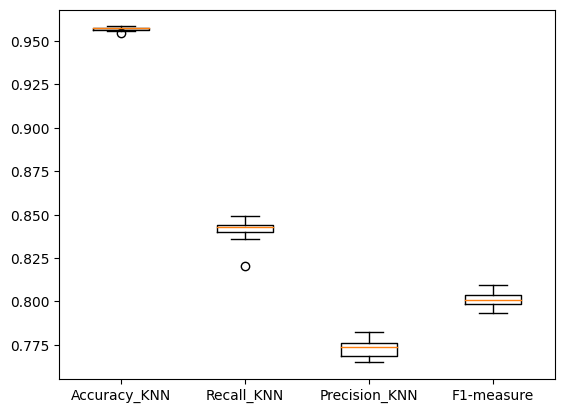

In [61]:
import matplotlib.pyplot as plt

data = [knn_acc, knn_pre, knn_rec, knn_f1]

plt.boxplot(data,labels = ['Accuracy_KNN','Recall_KNN','Precision_KNN','F1-measure'])
plt.show()

# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
classifer2 = DecisionTreeClassifier(random_state = 100)

# Train Decision Tree Classifer
classifer2 = classifer2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifer2.predict(X_test)

df3 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df3.to_csv('out.csv')

# printing accuracy
print("Accuracy: ",accuracy_score(y_test,y_pred))
# printing precision
print("Precision: ",precision_score(y_test,y_pred, average = 'macro'))
# printing recall
print("Recall: ",recall_score(y_test,y_pred, average = 'macro'))
# printing f1 score
print("F1_score: ",f1_score(y_test,y_pred, average = 'macro'))

Accuracy:  0.9995145336488864
Precision:  0.9977231498243639
Recall:  0.9963957699892364
F1_score:  0.9970552163897862


In [29]:
clf_acc = []
clf_pre = []
clf_rec = []
clf_f1 = []

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = i)

  classifer2.fit(X_train, y_train)

  y_pred = classifer2.predict(X_test)

  acc = accuracy_score(y_test,y_pred)
  clf_acc.append(acc)
  rec = recall_score(y_test,y_pred, average = 'macro')
  clf_rec.append(rec)
  pre =  precision_score(y_test,y_pred, average = 'macro')
  clf_pre.append(pre)
  f1 = f1_score(y_test,y_pred, average = 'macro')
  clf_f1.append(f1)



avg_acc = sum(clf_acc) / 10
avg_rec = sum(clf_rec) / 10
avg_pre = sum(clf_pre) / 10
avg_f1 = sum(clf_f1) / 10

print('Average Accuracy:', avg_acc)
print('Average Recall:', avg_rec)
print('Average Precision:', avg_pre)
print('Average F1-Score:', avg_f1)
report['DT'] = [avg_acc, avg_rec, avg_pre, avg_f1]

Average Accuracy: 0.999617695248498
Average Recall: 0.9978365591506527
Average Precision: 0.9976492691460377
Average F1-Score: 0.9977384984588025


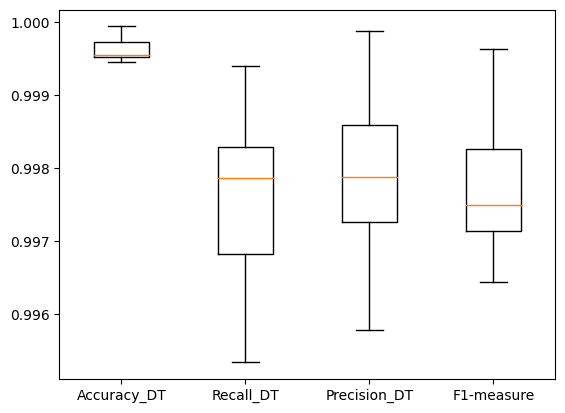

In [30]:
data = [clf_acc, clf_pre, clf_rec, clf_f1]

plt.boxplot(data,labels = ['Accuracy_DT','Recall_DT','Precision_DT','F1-measure'])
plt.show()

# GaussianNB

In [31]:
from sklearn.naive_bayes import GaussianNB
# Create Decision Tree classifer object
classifer3 = GaussianNB()

# Train Decision Tree Classifer
classifer3 = classifer3.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifer3.predict(X_test)
# printing accuracy
print("Accuracy: ",accuracy_score(y_test,y_pred))
# printing precision
print("Precision: ",precision_score(y_test,y_pred, average = 'macro'))
# printing recall
print("Recall: ",recall_score(y_test,y_pred, average = 'macro'))
# printing f1 score
print("F1_score: ",f1_score(y_test,y_pred, average = 'macro'))

Accuracy:  0.9777899144365556
Precision:  0.8433246317469606
Recall:  0.820906105388864
F1_score:  0.8304452414138136


In [32]:
nb_acc = []
nb_pre = []
nb_rec = []
nb_f1 = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = i)
# Performing training
  classifer3.fit(X_train, y_train)
#Calculate predictions (y_pred) using X_test
  y_pred = classifer3.predict(X_test)
  #print(y_pred)
# Display evaluation report
  acc = accuracy_score(y_test,y_pred)
  nb_acc.append(acc)
  rec = recall_score(y_test,y_pred, average = 'macro')
  nb_rec.append(rec)
  pre =  precision_score(y_test,y_pred, average = 'macro')
  nb_pre.append(pre)
  f1 = f1_score(y_test,y_pred, average = 'macro')
  nb_f1.append(f1)



avg_acc = sum(nb_acc) / 10
avg_rec = sum(nb_rec) / 10
avg_pre = sum(nb_pre) / 10
avg_f1 = sum(nb_f1) / 10

print('Average Accuracy:', avg_acc)
print('Average Recall:', avg_rec)
print('Average Precision:', avg_pre)
print('Average F1-Score:', avg_f1)
report['NB'] = [avg_acc, avg_rec, avg_pre, avg_f1]

Average Accuracy: 0.9761636021603254
Average Recall: 0.8105546950479076
Average Precision: 0.8320355599530078
Average F1-Score: 0.8194299210071214


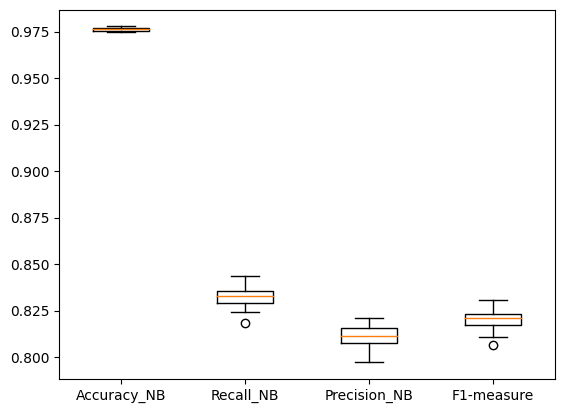

In [33]:
data = [nb_acc, nb_pre, nb_rec, nb_f1]

plt.boxplot(data,labels = ['Accuracy_NB','Recall_NB','Precision_NB','F1-measure'])
plt.show()

# Visulalization

In [34]:
knn_pref = {"Knn Accuracy": knn_acc, "Knn Recall": knn_rec, "Knn Precision": knn_pre, "Knn F1-score": knn_f1}
Dt_pref = {"DT Accuracy": clf_acc, "DT Recall": clf_rec, "DT Precision": clf_pre, "DT F1-score": clf_f1}
Nb_pref = {"NB Accuracy": nb_acc, "NB Recall": nb_rec, "NB Precision": nb_pre, "NB F1-score": nb_f1}

In [35]:
df_knn = pd.DataFrame(knn_pref, columns=knn_pref.keys())
df_Dt = pd.DataFrame(Dt_pref, columns=Dt_pref.keys())
df_nb = pd.DataFrame(Nb_pref, columns=Nb_pref.keys())


df_pref = pd.concat([df_knn, df_Dt, df_nb], axis=1)
df_pref

,Knn Accuracy,Knn Recall,Knn Precision,Knn F1-score,DT Accuracy,DT Recall,DT Precision,DT F1-score,NB Accuracy,NB Recall,NB Precision,NB F1-score
0,0.958068,0.770695,0.843750,0.802108,0.999454,0.995777,0.998055,0.996910,0.975302,0.797134,0.818154,0.806354
1,0.956733,0.775499,0.842585,0.803927,0.999454,0.997583,0.995333,0.996441,0.975423,0.808035,0.833205,0.818969
2,0.957279,0.767538,0.842707,0.798252,0.999515,0.997140,0.997984,0.997557,0.974938,0.802306,0.824052,0.810493
3,0.954488,0.764930,0.840710,0.796056,0.999757,0.998538,0.998357,0.998447,0.974574,0.807381,0.828621,0.816293
4,0.958371,0.781395,0.848958,0.809709,0.999939,0.999869,0.999399,0.999633,0.976758,0.815975,0.832908,0.823367
5,0.956429,0.774280,0.835809,0.799641,0.999818,0.998607,0.999124,0.998865,0.976394,0.815381,0.836088,0.822841
6,0.957279,0.766106,0.845068,0.798673,0.999515,0.998145,0.996723,0.997430,0.976880,0.810428,0.838481,0.822718
7,0.955641,0.773119,0.820222,0.793089,0.999636,0.998699,0.996672,0.997678,0.977001,0.812332,0.830909,0.819754
8,0.957522,0.782622,0.843731,0.807957,0.999575,0.997613,0.997122,0.997367,0.976576,0.815668,0.834614,0.823064
9,0.957097,0.776327,0.839356,0.803089,0.999515,0.996396,0.997723,0.997055,0.977790,0.820906,0.843325,0.830445


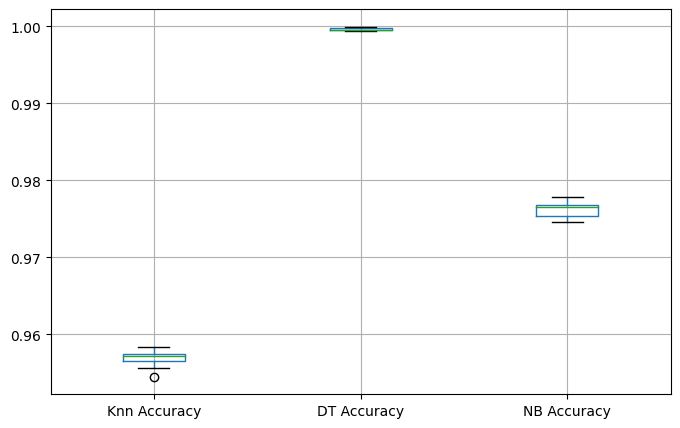

In [36]:
#plotting accuracy
fig = plt.figure(figsize =(8,5))
data = df_pref.loc[:, ["Knn Accuracy", "DT Accuracy", "NB Accuracy"]]
# Creating plot
data.boxplot()
# show plot
plt.show()

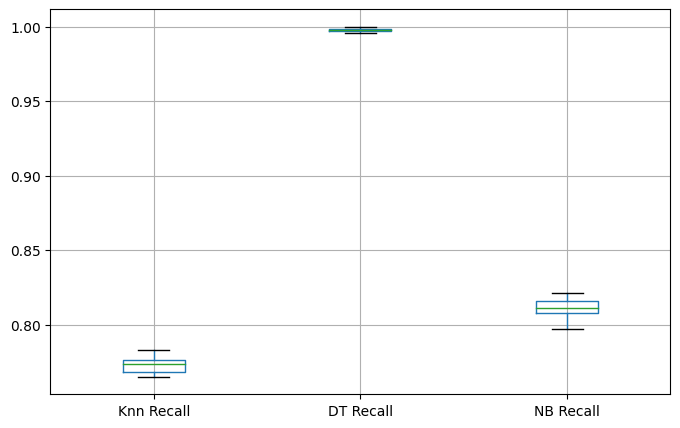

In [37]:
#Plot Recall
fig = plt.figure(figsize =(8,5))
data = df_pref.loc[:, ["Knn Recall", "DT Recall", "NB Recall"]]
# Creating plot
data.boxplot()
# show plot
plt.show()

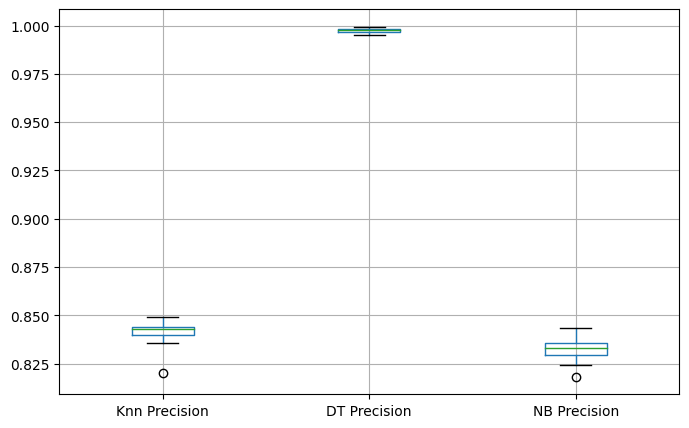

In [38]:
#Plot Precision
fig = plt.figure(figsize =(8,5))
data = df_pref.loc[:, ["Knn Precision", "DT Precision", "NB Precision"]]
# Creating plot
data.boxplot()
# show plot
plt.show()

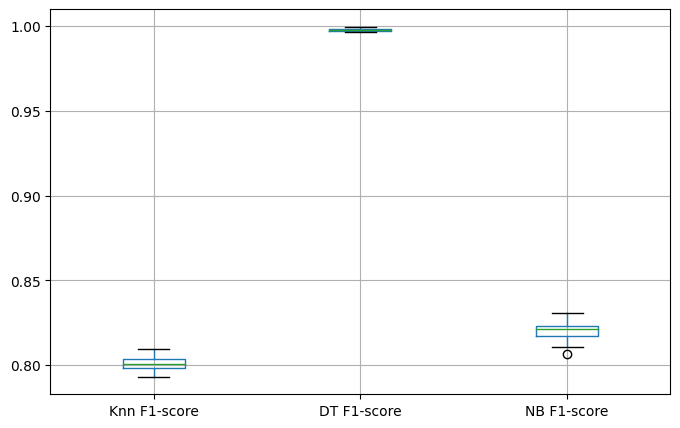

In [39]:
#Plot F1-score
fig = plt.figure(figsize =(8,5))
data = df_pref.loc[:, ["Knn F1-score", "DT F1-score", "NB F1-score"]]
# Creating plot
data.boxplot()
# show plot
plt.show()

In [40]:
knn_pref = [sum(knn_acc)/len(knn_acc), sum(knn_rec)/len(knn_rec), sum(knn_pre)/len(knn_pre), sum(knn_f1)/len(knn_f1)]
Dt_pref = [sum(clf_acc)/len(clf_acc), sum(clf_rec)/len(clf_rec), sum(clf_pre)/len(clf_pre), sum(clf_f1)/len(clf_f1)]
Nb_pref = [sum(nb_acc)/len(nb_acc), sum(nb_rec)/len(nb_rec),sum(nb_pre)/len(nb_pre), sum(nb_f1)/len(nb_f1)]

In [41]:
df_pref = pd.DataFrame([knn_pref, Dt_pref, Nb_pref],
                       columns = ['Accuracy', 'Recall', 'Precision', 'F1-score'],
                       index=  ['KNN', 'DT', 'NB'])
df_pref

,Accuracy,Recall,Precision,F1-score
KNN,0.956891,0.773251,0.840290,0.801250
DT,0.999618,0.997837,0.997649,0.997738
NB,0.976164,0.810555,0.832036,0.819430


In [42]:
accuarcy = df_pref['Accuracy']
recall = df_pref['Recall']
precision = df_pref['Precision']
f1_score = df_pref['F1-score']

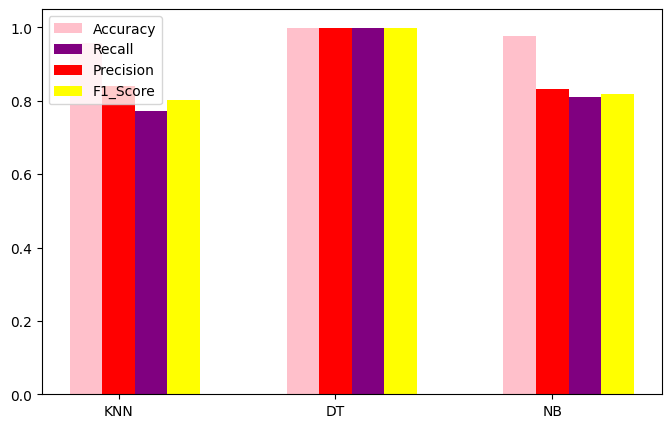

In [43]:
import numpy as np
x = np.arange(len(df_pref))
fig=plt.figure(figsize=(8,5))

plt.bar(x + 0.1, accuarcy, color='pink', width = 0.15, label='Accuarcy')
plt.bar(x + 0.4, recall, color='purple', width = 0.15, label='Precision')
plt.bar(x + 0.25, precision, color='red', width = 0.15, label='Recall')
plt.bar(x + 0.55, f1_score, color='yellow', width = 0.15, label='F1-score')
plt.xticks(x+0.25,  ['KNN', 'DT', 'NB'])
plt.legend(bbox_to_anchor=(1, 1))

plt.legend(['Accuracy', 'Recall', 'Precision', 'F1_Score'])

In [44]:
df_pref2 = df_pref.T
df_pref2

,KNN,DT,NB
Accuracy,0.956891,0.999618,0.976164
Recall,0.773251,0.997837,0.810555
Precision,0.840290,0.997649,0.832036
F1-score,0.801250,0.997738,0.819430


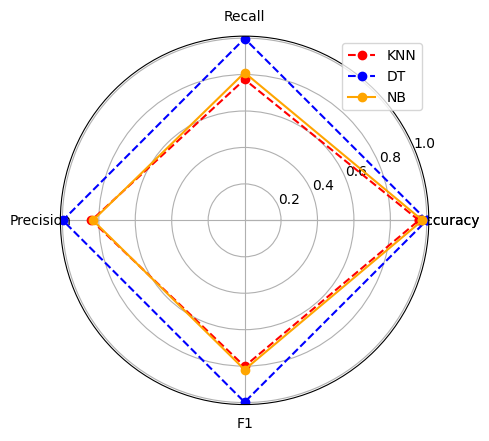

In [63]:
measure = ['Accuracy', 'Recall', 'Precision', 'F1']

knn = list(df_pref2['KNN'])
knn.append(knn[0])

dt = list(df_pref2['DT'])
dt.append(dt[0])

nb = list(df_pref2['NB'])
nb.append(nb[0])


angles= np.linspace(0,2*np.pi,len(measure), endpoint=False)
angles= np.concatenate((angles,[angles[0]]))
measure.append(measure[0])
fig=plt.figure(figsize=(5,10))
ax=fig.add_subplot(polar=True)

#KNN
ax.plot(angles, knn, 'o--', color='r', label='KNN')

#DT
ax.plot(angles, dt, 'o--', color='b', label='DT')

#NB
ax.plot(angles, nb, 'o-', color='orange', label='NB')

ax.set_thetagrids(angles * 180/np.pi, measure)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()